In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
sns.set(style='whitegrid',context='notebook')

In [4]:
filename = "category-sales-2015-06-01-2016-01-31.csv"
data = pd.read_csv(filename)

In [5]:
df = data.T

In [58]:
for n in range(df.shape[1]):
    df.rename(columns={df.columns[n]: df.iloc[0,n]}, inplace=True)

In [59]:
df = df[1:]

In [60]:
df2 = pd.read_csv(filename, index_col = 0)
df2 = df2.ix[5:10:,0::7]
df2.head()

,6/1/2015,6/8/2015,6/15/2015,6/22/2015,6/29/2015,7/6/2015,7/13/2015,7/20/2015,7/27/2015,8/3/2015,...,11/23/2015,11/30/2015,12/7/2015,12/14/2015,12/21/2015,12/28/2015,1/4/2016,1/11/2016,1/18/2016,1/25/2016
Category,,,,,,,,,,,,,,,,,,,,,
Canned Beverages,0.00900,0.01050,0.02400,0.01900,0.00900,0.03450,0.00750,0.02250,0.01350,0.05650,...,0.00900,0.01900,0.01900,0.02050,0.00900,0.02850,0.00700,0.01450,0.00200,0.01250
Card Gaming Accessories,0.00799,0.00525,0.00799,0.00325,0.00000,0.06000,0.00000,0.00136,0.00000,0.00999,...,0.02198,0.00000,0.06494,0.11334,0.00899,0.07093,0.02849,0.01624,0.04645,0.02349
Event Tickets,0.01000,0.00000,0.00000,0.01000,0.00500,0.00000,0.00000,0.00500,0.00000,0.00000,...,0.00500,0.00000,0.00000,0.00500,0.00000,0.00000,0.04000,0.04000,0.05000,0.04500
Food,0.03448,0.04834,0.04690,0.05928,0.02265,0.05903,0.01868,0.04703,0.05285,0.06621,...,0.03626,0.07288,0.03526,0.03912,0.07522,0.09647,0.02929,0.02367,0.03879,0.09899
Glass Bottled Soda,0.02600,0.04100,0.07200,0.09100,0.01600,0.09300,0.06400,0.04200,0.10700,0.07000,...,0.05500,0.05700,0.06900,0.08200,0.07100,0.06900,0.04200,0.02600,0.06800,0.07400


In [61]:


df.head()


,0.0,0.0045,0.13985,0.06491,0.0025,0.009,0.00799,0.01,0.03448,0.026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6/8/2015,0,0.002,0.13999,0.06994,0.0027,0.0105,0.00525,0,0.04834,0.041,...,0,0,0,0,0,0,0,0,0,0
6/15/2015,0,0.002,0,0.01392,0.00135,0.024,0.00799,0,0.0469,0.072,...,0,0,0,0,0,0,0,0,0,0
6/22/2015,0,0.003,0,0.03398,0.00135,0.019,0.00325,0.01,0.05928,0.091,...,0,0,0,0,0,0,0,0,0,0
6/29/2015,0,0,0.025,0.02048,0.00025,0.009,0,0.005,0.02265,0.016,...,0,0,0,0,0,0,0,0,0,0
7/6/2015,0,0,0,0.03599,0.00185,0.0345,0.06,0,0.05903,0.093,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df = data.T
for n in range(df.shape[1]):
    df.rename(columns={df.columns[n]: df.iloc[0,n]}, inplace=True)
df = df[1:]
df = df.ix[0::7]
df.head()

,Uncategorized,Beverages,Board Games,Bottled Beverages,Candy,Canned Beverages,Card Gaming Accessories,Event Tickets,Food,Glass Bottled Soda,...,Venue Fee,Birthdays,D&D,Dragon Ball Z,Clothing,Star Wars,Miniatures,Video Gaming,Figures And Models,WarMachine
6/1/2015,0,0.0045,0.13985,0.06491,0.0025,0.009,0.00799,0.01,0.03448,0.026,...,0,0,0,0,0,0,0,0,0,0
6/8/2015,0,0.002,0.13999,0.06994,0.0027,0.0105,0.00525,0,0.04834,0.041,...,0,0,0,0,0,0,0,0,0,0
6/15/2015,0,0.002,0,0.01392,0.00135,0.024,0.00799,0,0.0469,0.072,...,0,0,0,0,0,0,0,0,0,0
6/22/2015,0,0.003,0,0.03398,0.00135,0.019,0.00325,0.01,0.05928,0.091,...,0,0,0,0,0,0,0,0,0,0
6/29/2015,0,0,0.025,0.02048,0.00025,0.009,0,0.005,0.02265,0.016,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.columns

Index(['Uncategorized', 'Beverages', 'Board Games', 'Bottled Beverages',
       'Candy', 'Canned Beverages', 'Card Gaming Accessories', 'Event Tickets',
       'Food', 'Glass Bottled Soda',
       'MTG Sealed (booster packs, fat packs, etc)', 'Novelties', 'Pokemon',
       'Card Game', 'Network', 'Dice and accessories', 'Netrunner', 'Yu-Gi-Oh',
       'Magic The Gathering', 'Warhammer 40K', 'Force of Will',
       'Miscellaneous', '3D printing', 'Prize Support', 'Venue Fee',
       'Birthdays', 'D&D', 'Dragon Ball Z', 'Clothing', 'Star Wars',
       'Miniatures ', 'Video Gaming', 'Figures And Models', 'WarMachine'],
      dtype='object')

In [12]:
cols = ['Candy','Video Gaming','Board Games','D&D']
cols2 = ['Uncategorized', 'Beverages', 'Board Games', 'Bottled Beverages',
       'Candy', 'Canned Beverages', 'Card Gaming Accessories', 'Event Tickets',
       'Food', 'Glass Bottled Soda',
       'MTG Sealed (booster packs, fat packs, etc)', 'Novelties', 'Pokemon',
       'Card Game', 'Network', 'Dice and accessories', 'Netrunner', 'Yu-Gi-Oh',
       'Magic The Gathering', 'Warhammer 40K', 'Force of Will',
       'Miscellaneous', '3D printing', 'Prize Support', 'Venue Fee',
       'Birthdays', 'D&D', 'Dragon Ball Z', 'Clothing', 'Star Wars',
       'Miniatures ', 'Video Gaming', 'Figures And Models', 'WarMachine']

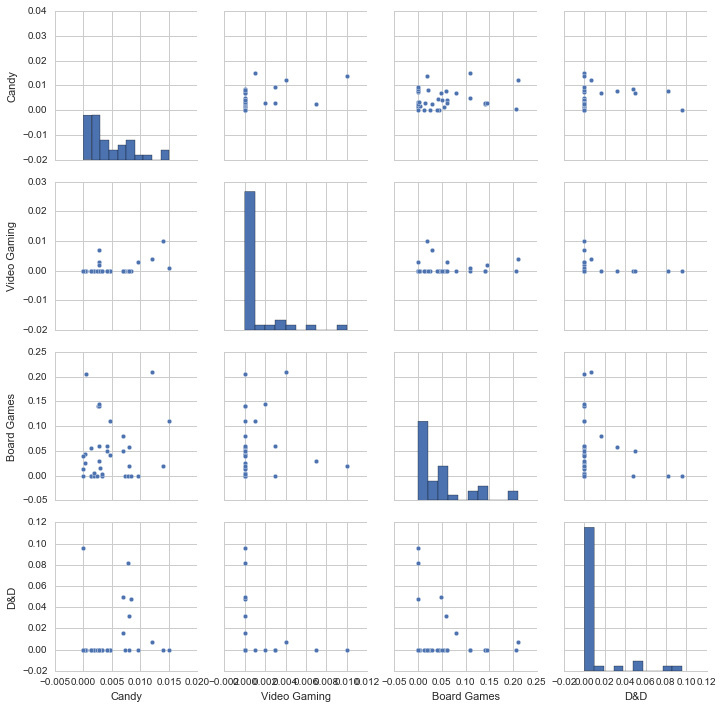

In [13]:
sns.pairplot(df[cols],size=2.5);

In [14]:
X = df[['Food']].values
y = df['Candy'].values

In [15]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.080
Intercept: 0.001


In [16]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return

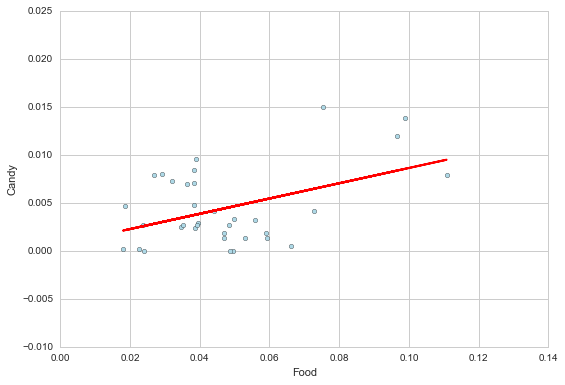

In [17]:
lin_regplot(X, y, slr)
plt.xlabel('Food')
plt.ylabel('Candy')
plt.tight_layout()

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

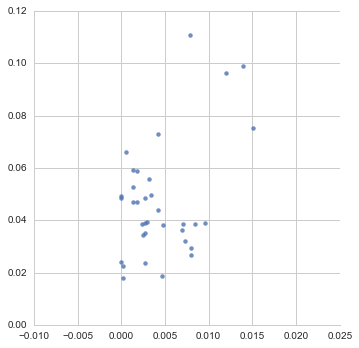

In [18]:
cols = ["Candy","Food"]
sns.lmplot("Candy","Food", df[cols])

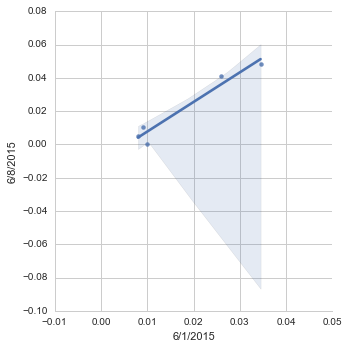

In [82]:
cols = ['6/1/2015','6/8/2015']
sns.lmplot('6/1/2015','6/8/2015', data=df2[cols], fit_reg = "true", scatter = "false", truncate = "false")

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

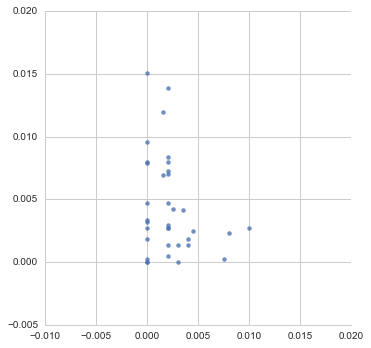

In [80]:
cols = ['Beverages','Candy']
sns.lmplot('Beverages','Candy', data=df[cols])

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

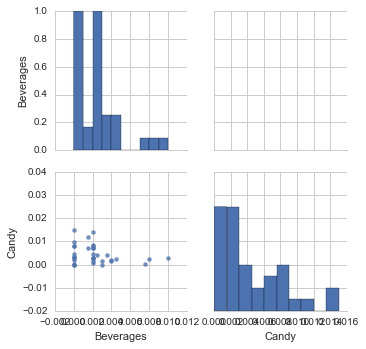

In [37]:
cols = ['Beverages','Candy']
sns.pairplot(df[cols], size=2.5, kind="reg");

In [83]:

df.interpolate().plot()

TypeError: Cannot interpolate with all NaNs.